# Datan analysointi K2020_2 - Tehtävät kerta 7 - RATKAISUT

Palauta Optiman palautuslaatikkoon viimeistään su 12.4. Kirjoita palautuslaatikon kommenttikenttään, mitkä tehtävät olet tehnyt kokonaan/osittain.

Opiskelijan nimi:

# 1. Asunnon hinta
Tiedostossa https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta7/teht1.txt on (kuvitteellisia) asuntojen myyntihintoja ja niiden tietoja (pinta-ala, makuuhuoneiden lukumäärä ja saunan olemassaolo).

Tee **lineaarien regressiomalli**, jossa selittävinä muuttujina on pinta-ala, makuuhuoneiden lukumäärä ja saunan olemassaolo ja selitettävänä muuttujana myyntihinta. 

(Joudut muuttamaan sauna-kentän numeeriseksi)

Laske mallille selityskerroin.

Kokeile sitten mitä saat selityskertoimiksi, jos käytät selittävinä muuttuujina vain kahta kolmesta mahdollisesta.

Piirrä parhaasta mallista kaavio ennustetuista ja havaituista arvoista.

Tässä ei jaeta dataa opetus- ja testidataan.

   ala  makuuhuoneita  sauna   hinta
0  193              3  kyllä  414800
1  147              3     ei  329900
2  220              3  kyllä  395500
3  130              2     ei  232000
4  275              4  kyllä  575400
kaikki:  0.7442335552970589
ala ja makuuhuoneita:  0.7335822686603743
ala ja sauna:  0.742057921659329
makuuhuoneita ja sauna:  0.25426882030277387


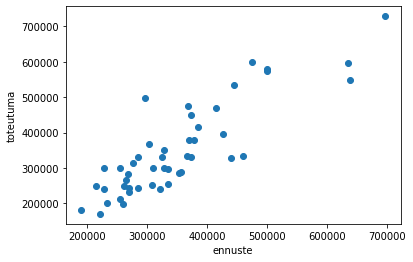

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df  = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta7/teht1.txt')
print(df.head())

df['sauna01'] = df['sauna'].map({'kyllä':1, 'ei':0})
df.drop('sauna', axis=1, inplace=True) # poistetaan sauna-teksikenttä

# kaikki

x = df[['ala','makuuhuoneita','sauna01']]
y= df['hinta']

malli1=LinearRegression()

malli1.fit(x,y)
print('kaikki: ',malli1.score(x,y))

# ei sauna-kenttää


x = df[['ala','makuuhuoneita']]
y= df['hinta']

malli2=LinearRegression()

malli2.fit(x,y)
print('ala ja makuuhuoneita: ',malli2.score(x,y))

# ei makuuhuoneita-kenttää

x = df[['ala','sauna01']]
y= df['hinta']

malli3=LinearRegression()

malli3.fit(x,y)
print('ala ja sauna: ', malli3.score(x,y))

# ei ala-kenttää

x = df[['makuuhuoneita','sauna01']]
y= df['hinta']

malli4=LinearRegression()

malli4.fit(x,y)
print('makuuhuoneita ja sauna: ', malli4.score(x,y))



# malli1 oli paras

x = df[['ala','makuuhuoneita','sauna01']]
y= df['hinta']

plt.scatter(malli1.predict(x),y)
plt.xlabel('ennuste')
plt.ylabel('toteutuma')
plt.show()

## 2. Ostaako

Tiedostossa https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta7/teht2.txt on dataa henkilön tuloista, sukupuolesta ja siviilisäädystä. Lisäksi on tieto onko henkilö ostanut tuotteen vai ei.

Tee **päätöspuu** asetuksella max_depth=4, joka yrittää selittää ostamista muiden kenttien avulla. Testaa sitten mallia ja  tulosta `score` ja `confusion_matrix`.

Joudut muuttamaan joitain kenttiä numeerisiksi.


Tee päätöspuusta vuokaavio (dot-tiedosto), visualisoi se ja päättele manuaalisesti sen avulla miten puu luokittelisi seuraavat tiedot:
* tulot 60000, naimisissa, nainen
* tulot 30000, ei-naimisissa, mies

Kirjoita vastaukseen kommenttina päättelyketjut.

Tässä ei jaeta dataa opetus- ja testidataan.

In [3]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta7/teht2.txt')

print(df.isnull().sum())


df['nainen'] = df['sukupuoli'].map({'nainen':1, 'mies':0})

df.drop('sukupuoli', axis=1, inplace=True)

x = df.drop('ostaa', axis=1)
y = df['ostaa']




malli2 = DecisionTreeClassifier(max_depth=4)


malli2.fit(x,y)


print('oikeiden osuus:',malli2.score(x,y)) 

from sklearn.metrics import confusion_matrix

y_pred = malli2.predict(x) # ennusteet kaikille lähtöarvoille
print(confusion_matrix(y, y_pred)) # verrataan totetutuneita arvoja ennusteisin

from sklearn.tree import export_graphviz

export_graphviz(decision_tree=malli2, out_file="ostaa.dot",
                feature_names=x.columns, class_names=True, filled=True, rounded=True)

# tulot 60000, naimisissa, nainen
 # tulot <= 57500.0  False
 # tulot <= 65500.0 True
 # naimisissa <= 0.5 False
 # tulot <= 63000.0 True  -> ostaa


#tulot 30000, ei-naimisissa, mies
 # tulot <= 57500.0  True
 # tulot <= 46500.0 True
 # tulot <= 34500.0 True -> ei osta

    
    

ostaa         0
tulot         0
sukupuoli     0
naimisissa    0
dtype: int64
oikeiden osuus: 0.9405646359583952
[[520  28]
 [ 12 113]]


## 3. Jyväskylän kämpät
Tiedostossa https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta7/teht5.txt on tietoja Jyväskylän toteutuneista kerrostaloasuntokaupoista  12 kk ajalta.

Jaa data opetusdataan (60%) ja testidataan (40%) ja tee opetusdatalla **lineaarinen regressiomalli** hinnan ennustamiseksi kentistä:
* m2
* rakennusvuosi
* hissi (muunna 0/1)
* kunto (muunna numeeriseksi)
* tee uusi kenttä onkoKeskustassa, joka saa arvon 1, jos kaupunginosa = Keskusta

Tsekkaa onko datassa puuttuvia arvoja ja korvaa ne ko. kentän mediaanilla. 

Testaa saatua mallia testidatalla.  
Piirrä hajontakaavioon ennusteen antamat arvot vs toteutuneet arvot.

kaupunginosa        0
huoneisto           2
m2                  0
hinta               0
rakennusvuosi       0
hissi               0
kunto              12
onkoKeskustassa     0
hissi01             0
kunto01            12
dtype: int64 


selityskerroin: 0.5263308006318267


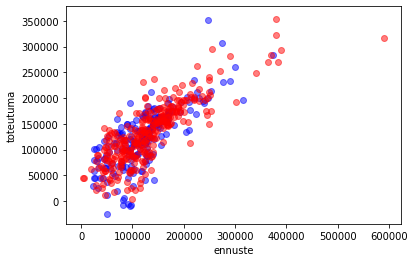

m2                 0.520989
rakennusvuosi      0.408784
onkoKeskustassa    0.256618
hissi01            0.337764
kunto01            0.420712
dtype: float64


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta7/teht5.txt')

df['onkoKeskustassa'] = (df['kaupunginosa']=='Keskusta').astype(int)
df['hissi01'] = df['hissi'].map({'on':1,'ei':0})
df['kunto01'] = df['kunto'].map({'hyvä':2,'tyyd.':1, 'huono': 0})

print(df.isnull().sum(),'\n\n')

# kunto01-kentässä on puuttuvia arvoja
med = df['kunto01'].median()
df['kunto01'].fillna(med, inplace=True)

from sklearn.model_selection import train_test_split 

x = df[['m2','rakennusvuosi','onkoKeskustassa', 'hissi01', 'kunto01']]
y = df['hinta']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.4)

malli=LinearRegression()

malli.fit(xTrain, yTrain)

print('selityskerroin:',malli.score(xTest, yTest))



ax1 = plt.scatter(yTest, malli.predict(xTest), color='b',alpha=0.5)
plt.scatter(yTrain, malli.predict(xTrain), color='r',alpha=0.5)
plt.xlabel('ennuste')
plt.ylabel('toteutuma')
plt.show()

print(x.corrwith(df['hinta']))

## 4. Koripallo

Tiedostossa https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta7/nba_logreg.csv on 1340 NBA-pelaajan tilastoja heidän tulokaskaudeltaan. 

[kenttien selitys (eng)](https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta7/nba.png)

Viimeinen sarake kertoo onko pelaaja sittemmin pelannut NBA:ssa yli 5 kautta. Kokeile kuinka hyvin **logistinen regressio** pystyy ennustamaan tämän muiden kentttien (pl. pelaajan nimi) avulla. Korvaa tarvittaessa puuttuvat arvot ko. kentän mediaanilla. Tulosta score ja confusion matrix.


Tee sitten sama kokeilu **päätöspuun** avulla. Tulosta tästä myös kuinka paljon eri kentät vaikuttavat mallin mukaan ennustettavaan muuttujaan.

Tässä ei tarvitse jakaa aineistoa opetus- ja testidataan.

In [5]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta7/nba_logreg.csv')

print(df.sample(10))  # antaa 10 satunnaista riviä  
print('\n-----------\n')

print(df.isnull().sum())
print('\n-----------\n')


print(df['TARGET_5Yrs'].value_counts())
print('\n-----------\n')

med = df['3P%'].median()
df['3P%'].fillna(med, inplace=True)



from sklearn.linear_model import LogisticRegression


x = df.drop(['Name','TARGET_5Yrs'], axis=1)
y = df['TARGET_5Yrs']


scaler = StandardScaler()
x = scaler.fit_transform(x)

malli2 = LogisticRegression()


malli2.fit(x,y)

print('oikeiden osuus log.reg.:',malli2.score(x,y)) 

from sklearn.metrics import confusion_matrix

y_pred = malli2.predict(x) # ennusteet kaikille lähtöarvoille
print(confusion_matrix(y, y_pred)) # verrataan totetutuneita arvoja ennusteisin


#----päätöspuu-------------

from sklearn.tree import DecisionTreeClassifier 

malli3 = DecisionTreeClassifier()


x = df.drop(['Name','TARGET_5Yrs'], axis=1)
y = df['TARGET_5Yrs']

malli3.fit(x,y)

# ennustetaan tulokset
y_pred = malli3.predict(x)

# katsotaan tarkkuus
print("Accuracy (päätöspuu):",malli3.score(x,y))
print(confusion_matrix(y, y_pred)) # verrataan totetutuneita arvoja ennusteisin

importances = malli3.feature_importances_
for i in range(len(importances)):
    print("feature: %12s - relative importance: %4.1f %%" % (x.columns[i], importances[i] * 100))



                 Name  GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA   3P%  \
652       Malcolm Lee  19  12.8   3.3  1.2   3.1  39.0      0.1  0.5  20.0   
22         Mark Macon  76  30.3  10.6  4.4  11.7  37.5      0.1  0.4  13.3   
97    Cedric Ceballos  63  11.6   8.2  3.2   6.7  48.7      0.0  0.1  16.7   
1020       Alton Ford  53   8.5   3.1  1.2   2.2  51.7      0.0  0.0   0.0   
801     Julian Wright  57  11.2   3.9  1.6   3.0  53.3      0.2  0.4  41.7   
599    Meyers Leonard  69  17.5   5.5  2.2   4.0  54.5      0.0  0.1  42.9   
294       Tim Kempton  66  14.2   4.4  1.5   3.1  47.1      0.0  0.0   0.0   
755     Ryan Anderson  66  19.9   7.4  2.4   6.2  39.3      1.0  2.9  36.5   
512        Jim Brogan  63  16.3   6.3  2.6   5.8  45.3      0.1  0.5  28.1   
606      John Jenkins  61  14.8   6.1  2.1   4.8  44.6      0.9  2.3  38.4   

      ...  FTA   FT%  OREB  DREB  REB  AST  STL  BLK  TOV  TARGET_5Yrs  
652   ...  0.9  82.4   0.5   0.9  1.4  1.6  0.4  0.2  0.9          0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 5. Sienet
Tiedostossa https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta7/mushrooms.csv on tietoja sienistä (kenttien selitykset [englanniksi](https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta7/mushrooms.txt)).

Pyri ennustamaan kentän _class_ arvoa muiden kenttien avulla **päätöspuulla**. 
Kentät ovat luokkamuotoisia, tyyliin 
>gill-attachment: attached=a,descending=d,free=f,notched=n

Tee siis ensin (selittävistä) kentistä dummy-kentät pandasin get_dummies-funktiolla, voit tehdä sen kerralla kaikille sarakkeille.

Jaa data opetusdataan ja testidataan 60/40%. 

Kokeile päätöspuulle max_depth-arvoja 2, 3, 4 ja 5 ja printtaa niiden antamat scoret ja confusion_matrixit.

In [6]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta7/mushrooms.csv')


print(df.isnull().sum())

x = df.drop('class', axis=1)
y = df['class']

x = pd.get_dummies(x)  # tekee kaikista x-DataFramen kentistä dummy-kentät
print(x.columns)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)


print('\n------ max_depth ei asetettu --------\n')
      
malli2 = DecisionTreeClassifier()

# tehdään malli opetusdatalla
malli2.fit(x_train,y_train)

# testataan testidatalla
print('oikeiden osuus:',malli2.score(x_test,y_test)) 

from sklearn.metrics import confusion_matrix

y_pred = malli2.predict(x_test) # ennusteet kaikille lähtöarvoille
print(confusion_matrix(y_test, y_pred)) # verrataan totetutuneita arvoja ennusteisin


# max_depth

for md in range(2,6):
    print('\n------ max_depth =',md,'--------\n')
    malli2 = DecisionTreeClassifier(max_depth=md)
    malli2.fit(x_train,y_train)
    print('oikeiden osuus:',malli2.score(x_test,y_test)) 
    y_pred = malli2.predict(x_test) # ennusteet kaikille lähtöarvoille
    print(confusion_matrix(y_test, y_pred)) # verrataan totetutuneita arvoja ennusteisin

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64
Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habit